## Importing libraries

In [75]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import time
from time import mktime
from matplotlib import pyplot as plt
import seaborn as sns
import patsy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
import folium
from pandas import *
from folium.map import Icon, Marker, Popup

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Importing my datasets

In [3]:
######## OLD DATA SET: NY_bikes = pd.read_csv("../../../Desktop/datasets/NYPD_Motor_Vehicle_Collisions.csv")
# NY_bike_count = pd.read_csv("../../../Desktop/datasets/NYC_bike_count.csv")
# NY_bike = pd.read_csv("../../../Downloads/NYPD_Motor_Vehicle_Collisions.csv")

# NY_weather_2012 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2012/1/1/CustomHistory.html\
# ?dayend=31&monthend=12&yearend=2012&req_city=&req_state=&req_statename=&reqdb.\
# zip=&reqdb.magic=&reqdb.wmo=&format=1')

# NY_weather_2013 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2013/1/1/CustomHistory.html\
# ?dayend=31&monthend=12&yearend=2013&req_city=&req_state=&req_statename=&reqdb.\
# zip=&reqdb.magic=&reqdb.wmo=&format=1')

# NY_weather_2014 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2014/1/1/CustomHistory.html\
# ?dayend=31&monthend=12&yearend=2014&req_city=&req_state=&req_statename=&reqdb.\
# zip=&reqdb.magic=&reqdb.wmo=&format=1')

# NY_weather_2015 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2015/1/1/CustomHistory.html\
# ?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.\
# zip=&reqdb.magic=&reqdb.wmo=&format=1')

# NY_weather_2016 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2016/1/1/CustomHistory.html\
# ?dayend=31&monthend=12&yearend=2016&req_city=&req_state=&req_statename=&reqdb.\
# zip=&reqdb.magic=&reqdb.wmo=&format=1')

## Munging data

In [71]:
## random sampling my dataset so that I can work with a more manageable set of data before applying it to the overall 
## set.

# import pickle

# NY_bike_samp = NY_bike.sample(frac=0.05)

# with open('/Users/porterspencer/Desktop/NY_bike_sample.pkl', 'w') as f:
#     pickle.dump(NY_bike_samp, f)
    
# with open('/Users/porterspencer/Desktop/NY_bike_sample.pkl', 'r') as f:
#     loaded_bike = pickle.load(f)

In [46]:
# # Replacing spaces(' ') in column header name with underscore('_')
# NY_bike.columns = NY_bike.columns.str.replace(' ', '_')

# ## Filling all 'NaN' values with zeros
# NY_bike.fillna(0, inplace=True)

# ## Converting the date/time columns to datetime
# NY_bike['DATE'] =pd.to_datetime(NY_bike['DATE'])
# NY_bike['TIME'] =pd.to_datetime(NY_bike['TIME'])

# ## Sorting the dataframe by date
# NY_bike = NY_bike.sort_values(by='DATE')

# ## filtering out the overall dataset so that I have data ending 12/31/2016
# NY = NY[NY['DATE'] < '01/01/2017']

# NY = NY_bike

# ## Munging the weather data:

# NY_weather_2012.columns = NY_weather_2012.columns.str.replace(' ', '_')
# NY_weather_2013.columns = NY_weather_2013.columns.str.replace(' ', '_')
# NY_weather_2014.columns = NY_weather_2014.columns.str.replace(' ', '_')
# NY_weather_2015.columns = NY_weather_2015.columns.str.replace(' ', '_')
# NY_weather_2016.columns = NY_weather_2016.columns.str.replace(' ', '_')

# NY_weather_2012.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2013.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2014.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2015.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2016.rename(columns={'EST': 'DATE'}, inplace=True)

# NY_weather_2012.fillna(0, inplace=True)
# NY_weather_2013.fillna(0, inplace=True)
# NY_weather_2014.fillna(0, inplace=True)
# NY_weather_2015.fillna(0, inplace=True)
# NY_weather_2016.fillna(0, inplace=True)

# NY_weather_2012['DATE'] = pd.to_datetime(NY_weather_2012['DATE'])
# NY_weather_2013['DATE'] = pd.to_datetime(NY_weather_2013['DATE'])
# NY_weather_2014['DATE'] = pd.to_datetime(NY_weather_2014['DATE'])
# NY_weather_2015['DATE'] = pd.to_datetime(NY_weather_2015['DATE'])
# NY_weather_2016['DATE'] = pd.to_datetime(NY_weather_2016['DATE'])

## Adding all the weather data together so now I have an overall weather file that spans 5 years.

# NY_weather = NY_weather_2012.append(NY_weather_2013.append(NY_weather_2014.append(NY_weather_2015.append(NY_weather_2016))))

In [ ]:
## saving the 'munged' version of my dataset to my desktop so that I don't need to import it each time

with open('/Users/porterspencer/Desktop/NY_bike.pkl', 'w') as f:
    pickle.dump(NY, f)
    
with open('/Users/porterspencer/Desktop/NY_bike.pkl', 'r') as f:
    NY_load = pickle.load(f)

In [ ]:
y, X = patsy.dmatrices()

# Functions

In [115]:
## writing a function to separate the NY_bike dataframe into multiple segments (quarterly and yearly) so that I can do 
## some trend analysis on a much more manageable set of data

def segment_func(bike_df, start_date, end_date):
    qtr_mask = (bike_df['DATE'] >= start_date) & (bike_df['DATE'] <= end_date)
    bike_masked = bike_df[qtr_mask]
    qtr_mask2 = ((bike_masked['NUMBER_OF_CYCLIST_INJURED'] != 0) | (bike_masked['NUMBER_OF_CYCLIST_KILLED'] != 0))
    return bike_masked[qtr_mask2]

## writing a function to extract the month from the datetime objects so that I can plot each month's aggregated totals
## for each month

def month_extract(col):
    MONTH = []
    for i in col:
        MONTH.append(i.month)
    return MONTH

## writing a function to extract the hour of the day from the datetime objects ('DATE' column) so that I can plot each 
## segment's volume of injury/death per each hour and see what time of day is most dangerous.

def hour_extract(col):
    HOUR = []
    for i in col:
        HOUR.append(i.hour)
    return HOUR

## making a function that creates a list containing a '1' if there was a cyclist injured/killed and a '0' if there were
## no cyclists injured/killed

def binary(col):
    CYCLISTS_INJURED = []
    for i in col:
        if i > 0:
            CYCLISTS_INJURED.append(1)
        else:
            CYCLISTS_INJURED.append(0)
    return CYCLISTS_INJURED

In [48]:
## joining the NY cycling and the NY weather dataframes on the date column (inner join)

NY_merged = NY.merge(NY_weather, how='inner', on='DATE')

In [140]:
NY_merged['HOUR'] = hour_extract(NY_merged['TIME'])

In [121]:
## creating a DF that shows the accidents in which more than 1 cyclist was injured

# cyclists_injured_over_1 = NY_merged[NY_merged['NUMBER_OF_CYCLIST_INJURED'] > 1]
# cyclists_killed_over_1 = NY_merged[NY_merged['NUMBER_OF_CYCLIST_KILLED'] > 1]
print "Total accidents injuring more than 1 cyclist:"
cyclists_injured_over_1['NUMBER_OF_CYCLIST_INJURED'].sum()
print "__________________________________________________\n"

print "Total accidents killing more than 1 cyclist:"
cyclists_killed_over_1['NUMBER_OF_CYCLIST_KILLED'].sum()

Total accidents injuring more than 1 cyclist:


2126

__________________________________________________

Total accidents killing more than 1 cyclist:


2

In [123]:
cyclist_injured_over_1.groupby('BOROUGH')['NUMBER_OF_CYCLIST_INJURED']

In [127]:
cyclist_injured_over_1.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_CYCLIST_INJURED'].sum().sort_values(ascending=False)

CONTRIBUTING_FACTOR_VEHICLE_1
Unspecified                                              1773
Driver Inattention/Distraction                            137
Failure to Yield Right-of-Way                              56
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      32
Traffic Control Disregarded                                21
Passing or Lane Usage Improper                             15
Driver Inexperience                                        10
Passenger Distraction                                      10
Physical Disability                                         9
Pavement Defective                                          6
Aggressive Driving/Road Rage                                5
Alcohol Involvement                                         5
Backing Unsafely                                            5
Turning Improperly                                          5
Drugs (Illegal)                                             4
View Obstructed/Limited                 

In [147]:
## digging into the various reasons for the accidents and which time of day are the most common for each

NY_merged.groupby(['HOUR','CONTRIBUTING_FACTOR_VEHICLE_1'])['NUMBER_OF_CYCLIST_INJURED'].sum().sort_values(ascending=False)

HOUR  CONTRIBUTING_FACTOR_VEHICLE_1              
18    Unspecified                                    980
17    Unspecified                                    892
19    Unspecified                                    829
20    Unspecified                                    783
16    Unspecified                                    769
14    Unspecified                                    691
15    Unspecified                                    640
21    Unspecified                                    640
13    Unspecified                                    589
12    Unspecified                                    503
11    Unspecified                                    493
22    Unspecified                                    455
9     Unspecified                                    417
8     Unspecified                                    397
10    Unspecified                                    357
23    Unspecified                                    328
0     Unspecified                     

In [146]:
## now for deaths..

NY_merged.groupby(['HOUR', 'CONTRIBUTING_FACTOR_VEHICLE_1'])['NUMBER_OF_CYCLIST_KILLED'].sum().sort_values(ascending=False)

HOUR  CONTRIBUTING_FACTOR_VEHICLE_1                        
17    Unspecified                                              5
21    Unspecified                                              4
6     Unspecified                                              4
23    Unspecified                                              3
12    Unspecified                                              3
19    Unspecified                                              3
8     Unspecified                                              2
9     Passenger Distraction                                    2
21    Driver Inattention/Distraction                           2
16    Unspecified                                              2
14    Unspecified                                              2
0     Unspecified                                              2
20    Unspecified                                              2
8     Drugs (Illegal)                                          2
10    Unspecified             

In [48]:
## joining the NY cycling and the NY weather dataframes on the date column (inner join)

NY_merged = NY.merge(NY_weather, how='inner', on='DATE')

In [110]:
## creating a DF that shows the accidents in which more than 1 cyclist was injured

cyclists_injured_over_1 = NY_merged[NY_merged['NUMBER_OF_CYCLIST_INJURED'] > 1]
cyclists_killed_over_1 = NY_merged[NY_merged['NUMBER_OF_CYCLIST_KILLED'] > 1]
cyclists_injured_over_1.NUMBER_OF_CYCLIST_INJURED.sum()
cyclists_killed_over_1.NUMBER_OF_CYCLIST_KILLED.sum()

2

In [105]:
## passing the Cyclist injured and Cyclist killed columns through the binary function 

CYCLISTS = binary(NY_merged['NUMBER_OF_CYCLIST_INJURED'])
CYCLISTS_2 = binary(NY_merged['NUMBER_OF_CYCLIST_KILLED'])
NY_merged['CYCLISTS_INJURED'] = CYCLISTS
NY_merged['CYCLISTS_KILLED'] = CYCLISTS_2

In [124]:
NY_merged.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP_CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON_STREET_NAME', u'CROSS_STREET_NAME',
       u'OFF_STREET_NAME', u'NUMBER_OF_PERSONS_INJURED',
       u'NUMBER_OF_PERSONS_KILLED', u'NUMBER_OF_PEDESTRIANS_INJURED',
       u'NUMBER_OF_PEDESTRIANS_KILLED', u'NUMBER_OF_CYCLIST_INJURED',
       u'NUMBER_OF_CYCLIST_KILLED', u'NUMBER_OF_MOTORIST_INJURED',
       u'NUMBER_OF_MOTORIST_KILLED', u'CONTRIBUTING_FACTOR_VEHICLE_1',
       u'CONTRIBUTING_FACTOR_VEHICLE_2', u'CONTRIBUTING_FACTOR_VEHICLE_3',
       u'CONTRIBUTING_FACTOR_VEHICLE_4', u'CONTRIBUTING_FACTOR_VEHICLE_5',
       u'UNIQUE_KEY', u'VEHICLE_TYPE_CODE_1', u'VEHICLE_TYPE_CODE_2',
       u'VEHICLE_TYPE_CODE_3', u'VEHICLE_TYPE_CODE_4', u'VEHICLE_TYPE_CODE_5',
       u'MONTH', u'Max_TemperatureF', u'Mean_TemperatureF',
       u'Min_TemperatureF', u'Max_Dew_PointF', u'MeanDew_PointF',
       u'Min_DewpointF', u'Max_Humidity', u'_Mean_Humidity', u'_Min_Humidity',
       u'_Max_Sea_Level

In [ ]:
NY_temp = NY_merged.drop(['LATITUDE', 'LONGITUDE', 'LOCATION', 'UNIQUE_KEY', ''])

In [105]:
## passing the Cyclist injured and Cyclist killed columns through the binary function 

CYCLISTS = binary(NY_merged['NUMBER_OF_CYCLIST_INJURED'])
CYCLISTS_2 = binary(NY_merged['NUMBER_OF_CYCLIST_KILLED'])
NY_merged['CYCLISTS_INJURED'] = CYCLISTS
NY_merged['CYCLISTS_KILLED'] = CYCLISTS_2

In [6]:
## separating my dataframe into years and quarters for trend analysis (number of accidents over time) and masking those
## dataframes to only show those instances in which cyclists were injured or killed

## years

NY_2012 = segment_func(NY, '01/01/2012', '12/31/2012')
NY_2013 = segment_func(NY, '01/01/2013', '12/31/2013')
NY_2014 = segment_func(NY, '01/01/2014', '12/31/2014')
NY_2015 = segment_func(NY, '01/01/2015', '12/31/2015')
NY_2016 = segment_func(NY, '01/01/2016', '12/31/2016')

## quarters

q3_12 = segment_func(NY, '07/01/2012', '09/30/2012')
q4_12 = segment_func(NY, '10/01/2012', '12/31/2012')
q1_13 = segment_func(NY, '01/01/2013', '03/31/2013')
q2_13 = segment_func(NY, '04/01/2013', '06/30/2013')
q3_13 = segment_func(NY, '07/01/2013', '09/30/2013')
q4_13 = segment_func(NY, '10/01/2013', '12/31/2013')
q1_14 = segment_func(NY, '01/01/2014', '03/31/2014')
q2_14 = segment_func(NY, '04/01/2014', '06/30/2014')
q3_14 = segment_func(NY, '07/01/2014', '09/30/2014')
q4_14 = segment_func(NY, '10/01/2014', '12/31/2014')
q1_15 = segment_func(NY, '01/01/2015', '03/31/2015')
q2_15 = segment_func(NY, '04/01/2015', '06/30/2015')
q3_15 = segment_func(NY, '07/01/2015', '09/30/2015')
q4_15 = segment_func(NY, '10/01/2015', '12/31/2015')
q1_16 = segment_func(NY, '01/01/2016', '03/31/2016')
q2_16 = segment_func(NY, '04/01/2016', '06/30/2016')
q3_16 = segment_func(NY, '07/01/2016', '09/30/2016')
q4_16 = segment_func(NY, '10/01/2016', '12/31/2016')

In [7]:
## creating 'month' columns in the yearly and quarterly dataframes using the month extraction function previously created

## years

NY_2012['MONTH'] = month_extract(NY_2012['DATE'])
NY_2013['MONTH'] = month_extract(NY_2013['DATE'])
NY_2014['MONTH'] = month_extract(NY_2014['DATE'])
NY_2015['MONTH'] = month_extract(NY_2015['DATE'])
NY_2016['MONTH'] = month_extract(NY_2016['DATE'])

## months

q3_12['MONTH'] = month_extract(q3_12['DATE'])
q4_12['MONTH'] = month_extract(q4_12['DATE'])
q1_13['MONTH'] = month_extract(q1_13['DATE'])
q2_13['MONTH'] = month_extract(q2_13['DATE'])
q3_13['MONTH'] = month_extract(q3_13['DATE'])
q4_13['MONTH'] = month_extract(q4_13['DATE'])
q1_14['MONTH'] = month_extract(q1_14['DATE'])
q2_14['MONTH'] = month_extract(q2_14['DATE'])
q3_14['MONTH'] = month_extract(q3_14['DATE'])
q4_14['MONTH'] = month_extract(q4_14['DATE'])
q1_15['MONTH'] = month_extract(q1_15['DATE'])
q2_15['MONTH'] = month_extract(q2_15['DATE'])
q3_15['MONTH'] = month_extract(q3_15['DATE'])
q4_15['MONTH'] = month_extract(q4_15['DATE'])
q1_16['MONTH'] = month_extract(q1_16['DATE'])
q2_16['MONTH'] = month_extract(q2_16['DATE'])
q3_16['MONTH'] = month_extract(q3_16['DATE'])
q4_16['MONTH'] = month_extract(q4_16['DATE'])

In [8]:
## creating 'hour' columns in the yearly and monthly dataframes using the function previously created so that I can 
## group the data by hour of the day 

## years

NY_2012['HOUR'] = hour_extract(NY_2012['TIME'])
NY_2013['HOUR'] = hour_extract(NY_2013['TIME'])
NY_2014['HOUR'] = hour_extract(NY_2014['TIME'])
NY_2015['HOUR'] = hour_extract(NY_2015['TIME'])
NY_2016['HOUR'] = hour_extract(NY_2016['TIME'])

## months

q3_12['HOUR'] = hour_extract(q3_12['TIME'])
q4_12['HOUR'] = hour_extract(q4_12['TIME'])
q1_13['HOUR'] = hour_extract(q1_13['TIME'])
q2_13['HOUR'] = hour_extract(q2_13['TIME'])
q3_13['HOUR'] = hour_extract(q3_13['TIME'])
q4_13['HOUR'] = hour_extract(q4_13['TIME'])
q1_14['HOUR'] = hour_extract(q1_14['TIME'])
q2_14['HOUR'] = hour_extract(q2_14['TIME'])
q3_14['HOUR'] = hour_extract(q3_14['TIME'])
q4_14['HOUR'] = hour_extract(q4_14['TIME'])
q1_15['HOUR'] = hour_extract(q1_15['TIME'])
q2_15['HOUR'] = hour_extract(q2_15['TIME'])
q3_15['HOUR'] = hour_extract(q3_15['TIME'])
q4_15['HOUR'] = hour_extract(q4_15['TIME'])
q1_16['HOUR'] = hour_extract(q1_16['TIME'])
q2_16['HOUR'] = hour_extract(q2_16['TIME'])
q3_16['HOUR'] = hour_extract(q3_16['TIME'])
q4_16['HOUR'] = hour_extract(q4_16['TIME'])

In [9]:
# q3_2012.index = q3_2012.DATE

# ## Aggregating the 2012 dataframe by month to show totals for each month I have data for in 2012.

# q3_2012_ = q3_2012.resample("M", how='sum')
# q3_2012_['DATE'] = q3_2012_.index

# ax = q3_2012_.plot(x='DATE', y='NUMBER_OF_CYCLIST_INJURED', colormap='cubehelix', kind='bar', title='Cyclists injured in 2012')
# ax = q3_2012_.plot(x='DATE', y='NUMBER_OF_CYCLIST_KILLED', color='red', kind='bar', title='Cyclists killed in 2012', ax=ax)
# plt.show()

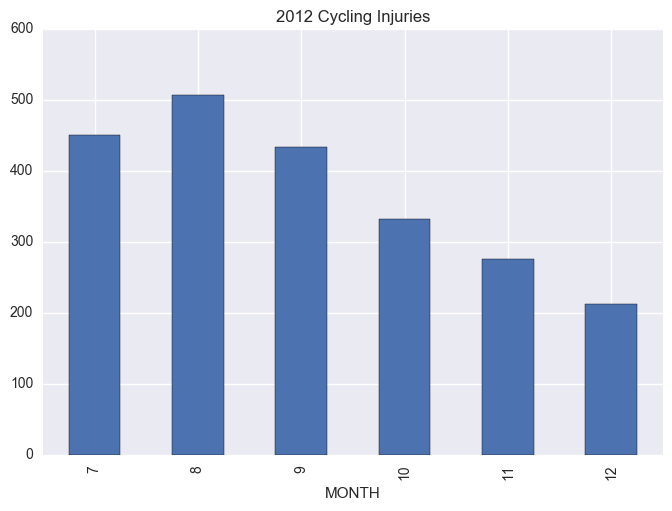

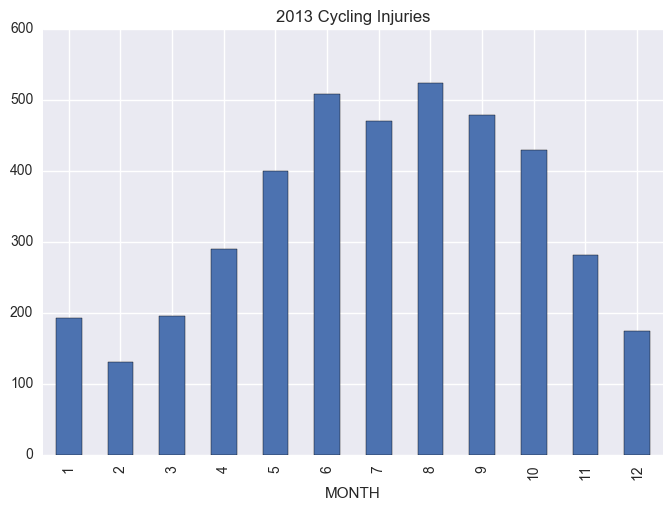

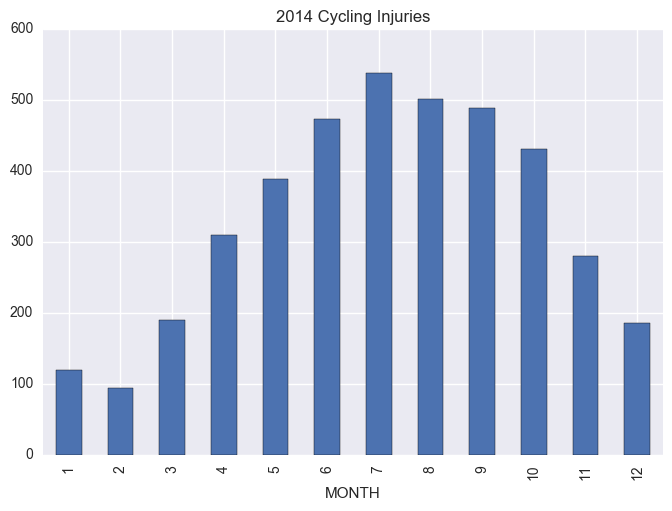

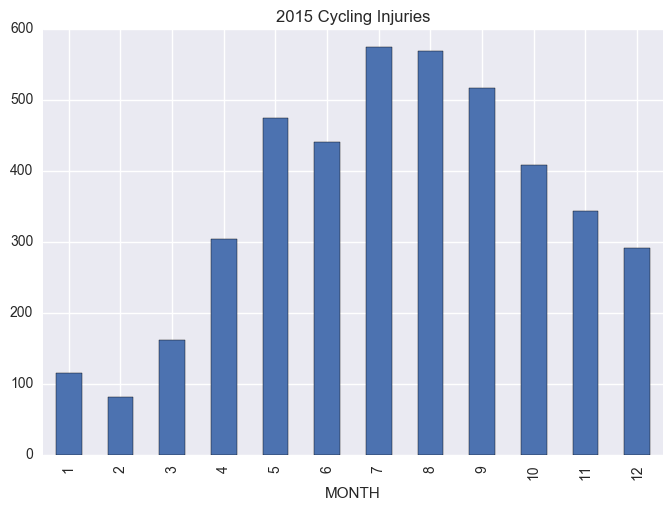

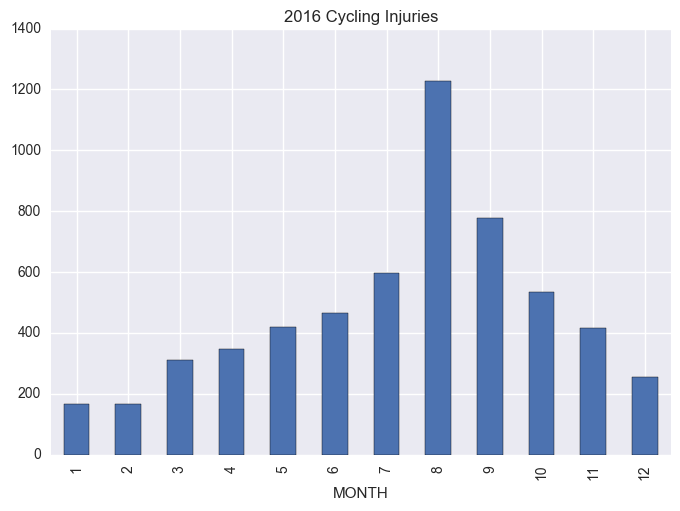

In [11]:
## plotting the total number of CYCLING INJURIES per month for each of the five years I have data for.
## Interesting initial observation - July/August are consistently the two most dangerous months in terms of sheer 
## number of accidents that occur on the road

NY_2012.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2012 Cycling Injuries', kind='bar')
plt.show()
NY_2013.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2013 Cycling Injuries', kind='bar')
plt.show()
NY_2014.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2014 Cycling Injuries', kind='bar')
plt.show()
NY_2015.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2015 Cycling Injuries', kind='bar')
plt.show()
NY_2016.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2016 Cycling Injuries', kind='bar')
plt.show()


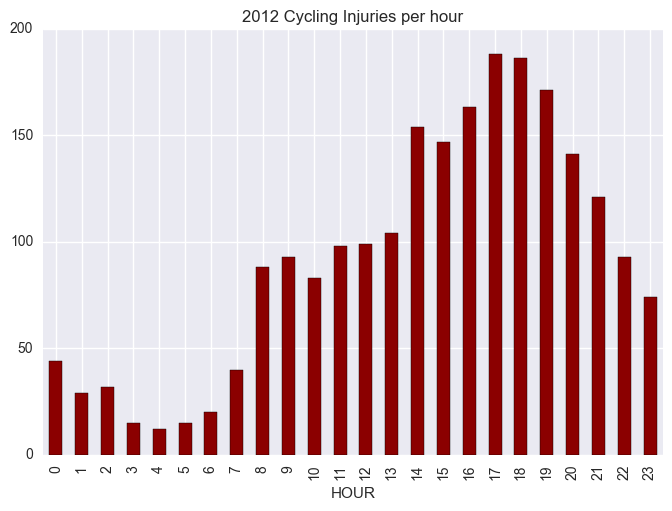

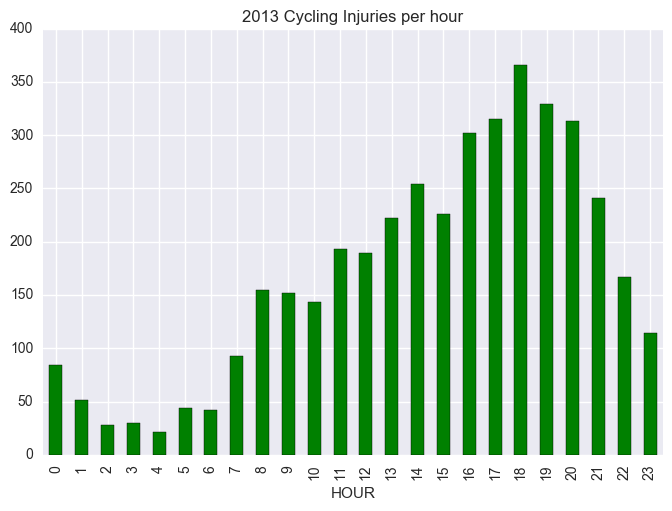

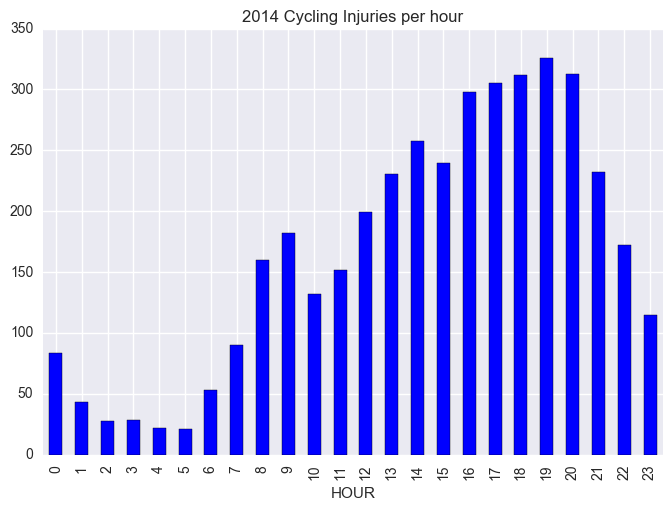

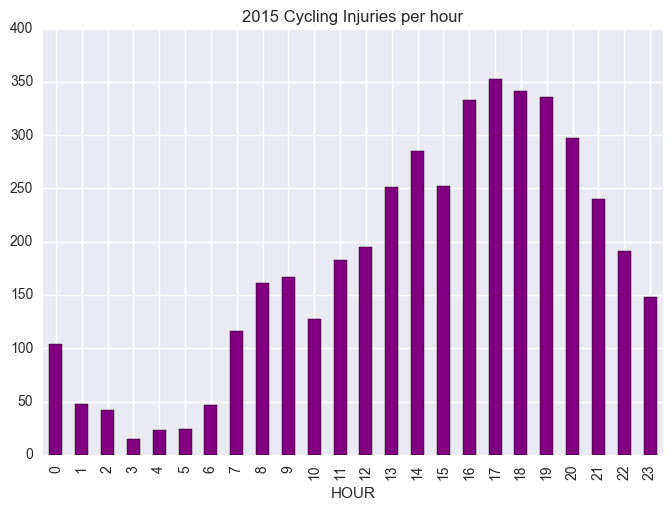

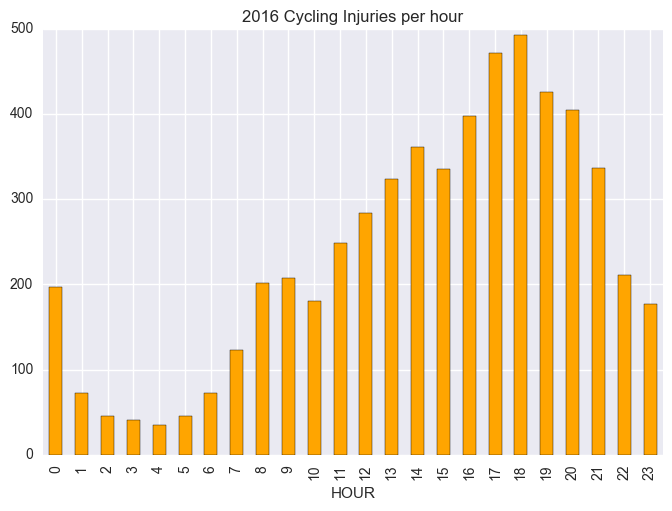

In [12]:
## plotting the amount of cycling injuries per hour for each of the 5 years

NY_2012.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2012 Cycling Injuries per hour', kind='bar', color='darkred')
plt.show()
NY_2013.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2013 Cycling Injuries per hour', kind='bar', color='green')
plt.show()
NY_2014.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2014 Cycling Injuries per hour', kind='bar', color='blue')
plt.show()
NY_2015.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2015 Cycling Injuries per hour', kind='bar', color='purple')
plt.show()
NY_2016.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2016 Cycling Injuries per hour', kind='bar', color='orange')
plt.show()

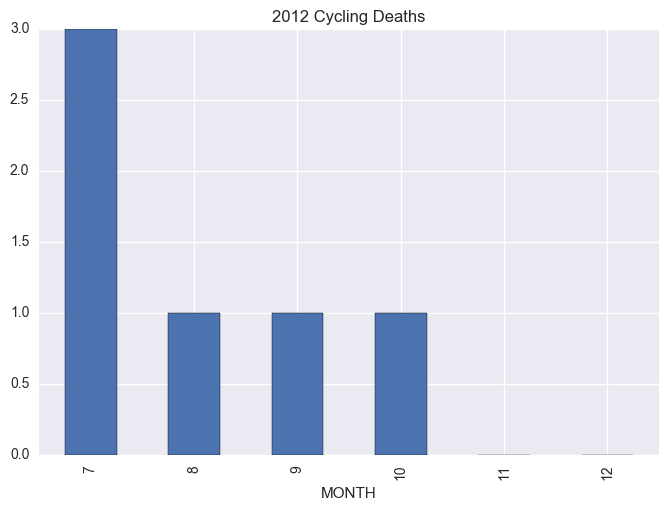

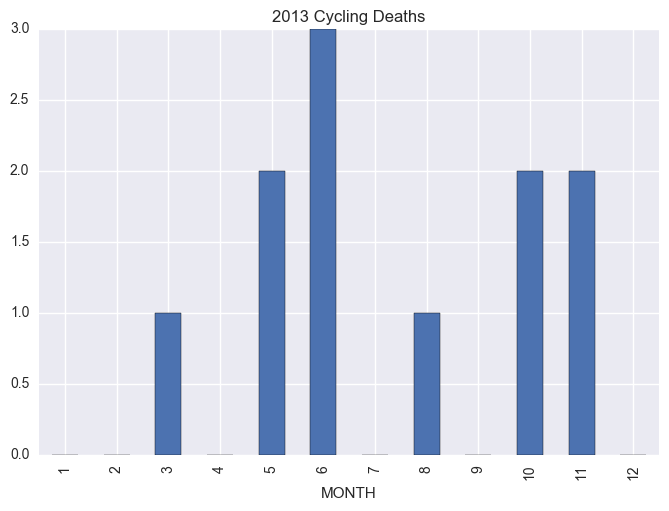

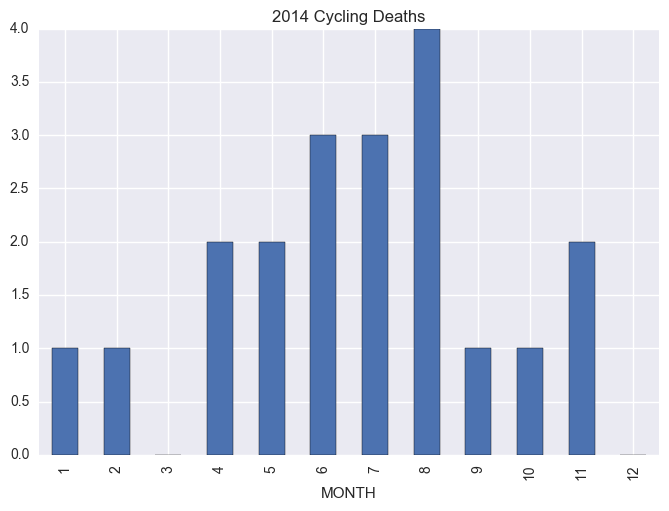

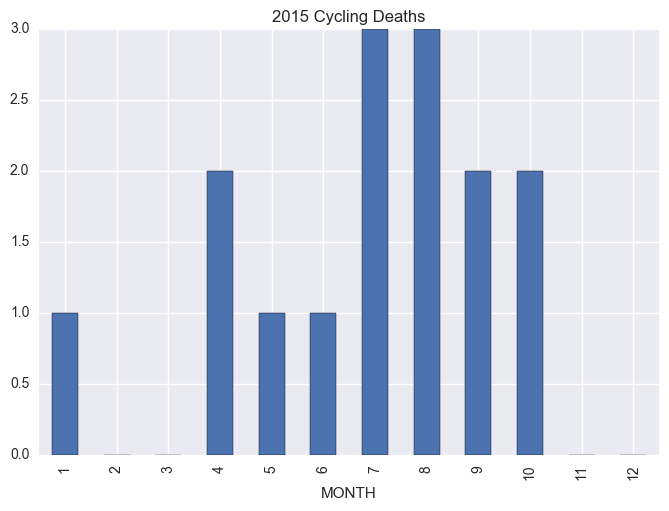

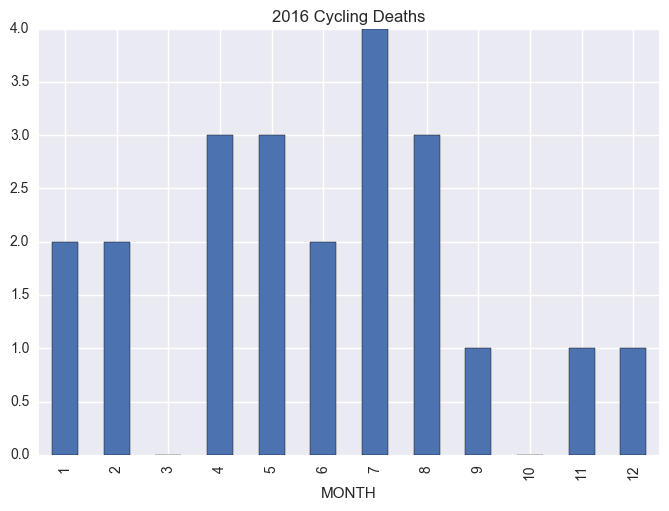

In [13]:
## similar results as above for cycling deaths across the 12 months in the year

NY_2012.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2012 Cycling Deaths', kind='bar')
plt.show()
NY_2013.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2013 Cycling Deaths', kind='bar')
plt.show()
NY_2014.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2014 Cycling Deaths', kind='bar')
plt.show()
NY_2015.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2015 Cycling Deaths', kind='bar')
plt.show()
NY_2016.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2016 Cycling Deaths', kind='bar')
plt.show()

In [14]:
NY_overall = NY_2012.append(NY_2013.append(NY_2014.append(NY_2015.append(NY_2016))))

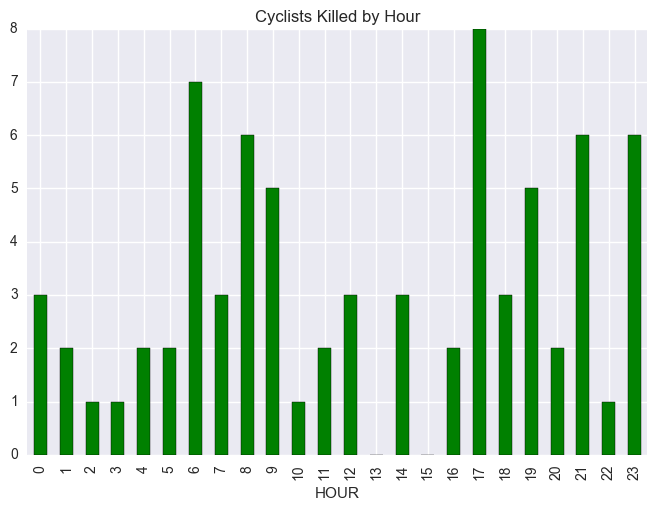

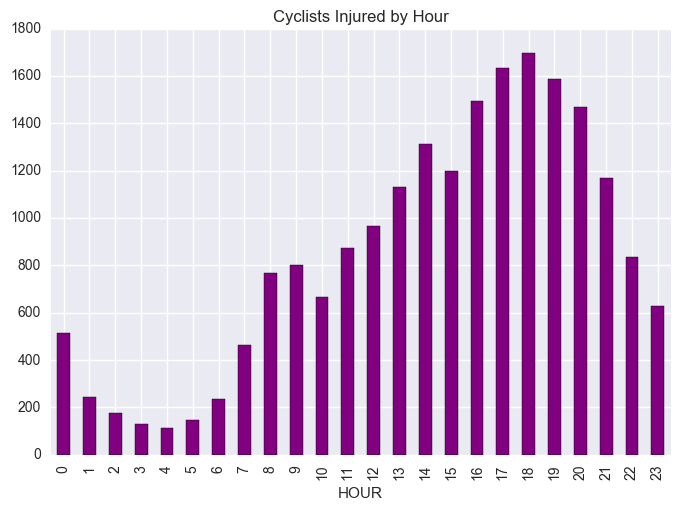

In [15]:
NY_overall.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(kind='bar', title='Cyclists Killed by Hour', color='green')
plt.show()
NY_overall.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(kind='bar', title='Cyclists Injured by Hour', color='purple')
plt.show()

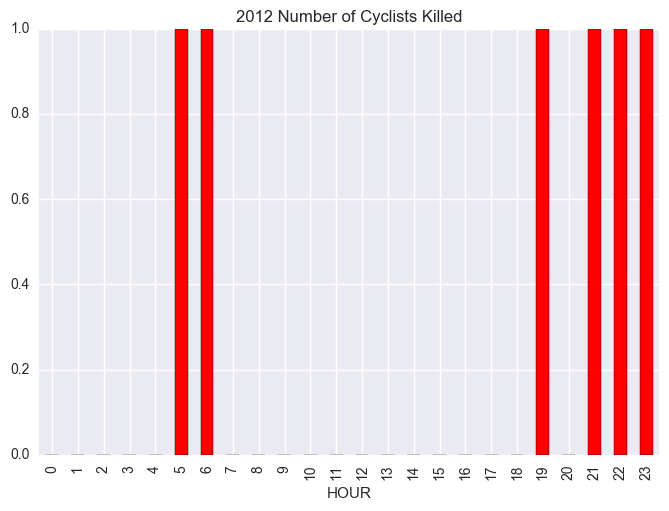

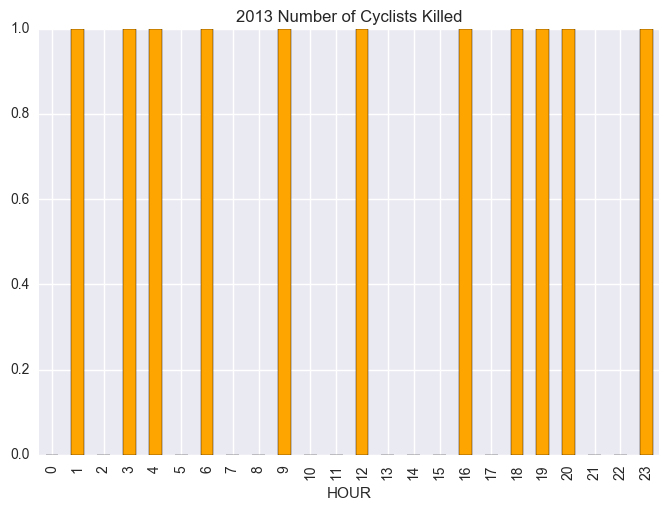

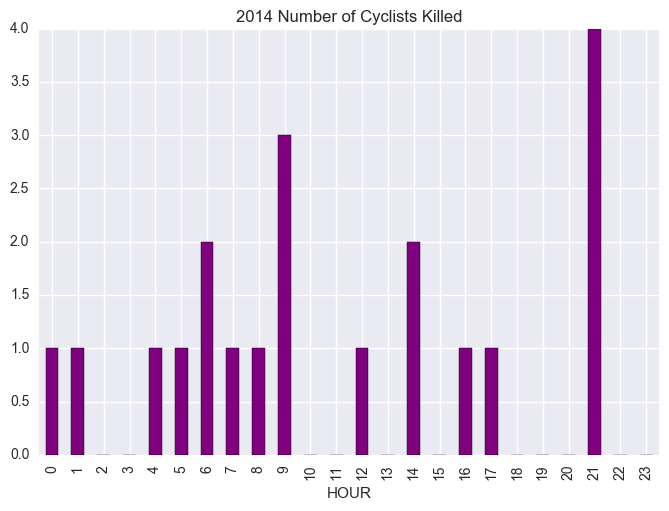

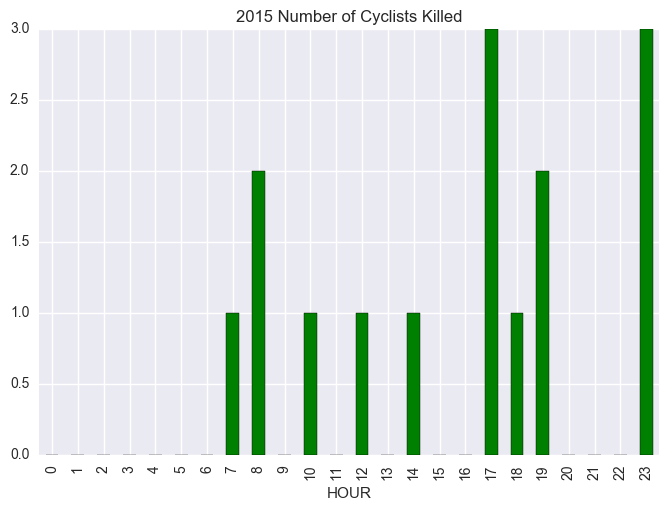

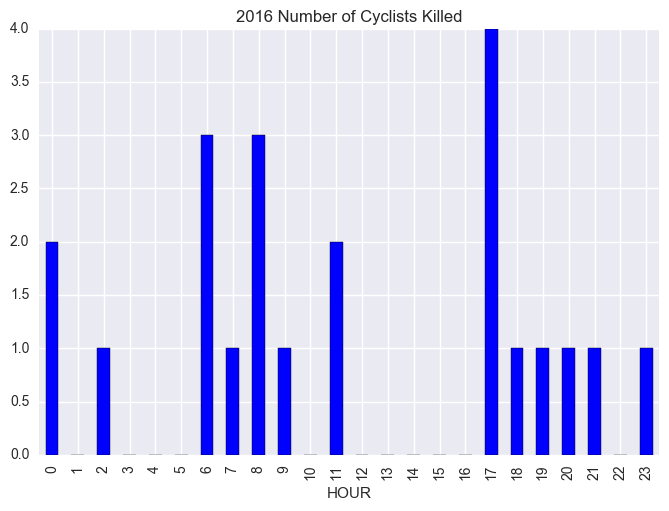

In [16]:
NY_2012.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2012 Number of Cyclists Killed', kind='bar', color='red')
plt.show()
NY_2013.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2013 Number of Cyclists Killed', kind='bar', color='orange')
plt.show()
NY_2014.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2014 Number of Cyclists Killed', kind='bar', color='purple')
plt.show()
NY_2015.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2015 Number of Cyclists Killed', kind='bar', color='green')
plt.show()
NY_2016.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2016 Number of Cyclists Killed', kind='bar', color='blue')
plt.show()

In [17]:
NY['MONTH'] = month_extract(NY['DATE'])

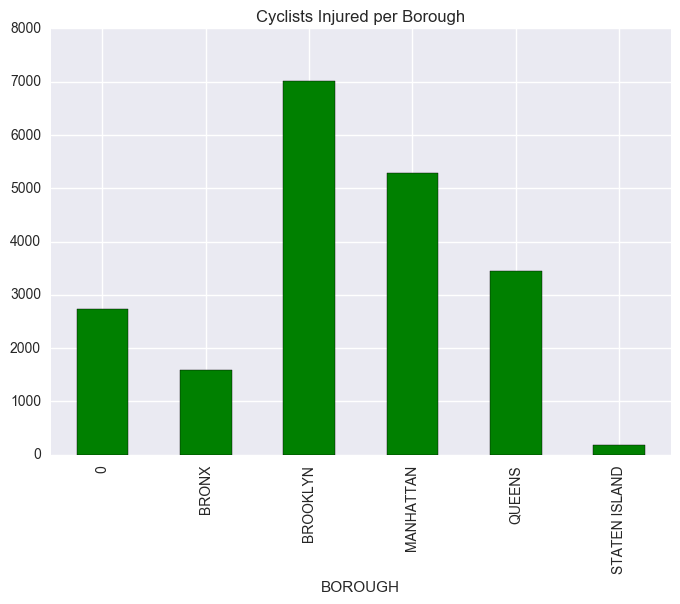

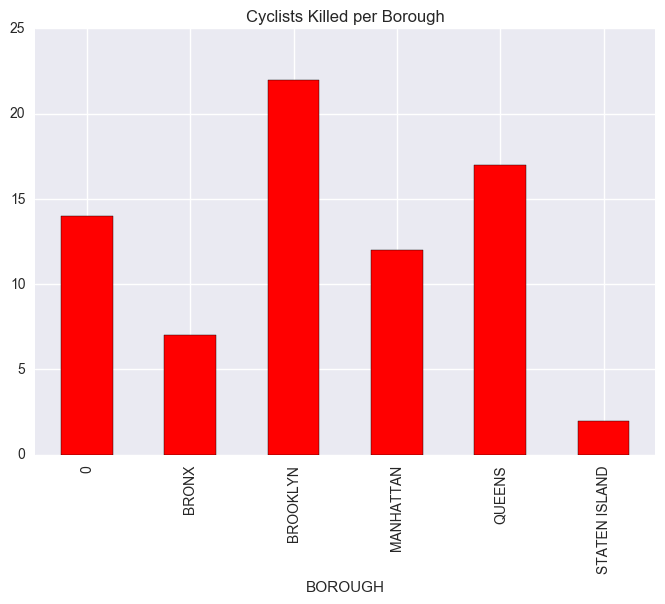

In [19]:
## plotted the cyclists injured and killed by NYC borough. The most dangerous out of all 5 major boroughs is Brooklyn.

NY_overall.groupby(['BOROUGH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(kind='bar', color='green', title='Cyclists Injured per Borough')
plt.show()
NY_overall.groupby(['BOROUGH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(kind='bar', color='red', title='Cyclists Killed per Borough')
plt.show()

In [20]:
## There were 2736 cyclists that were injured and 15 cyclists that were killed over the span between 2012 through 2015
## that occurred in the borough '0'. 

## I masked my dataset to show only those collisions in borough '0' so that I can investigate further.

NY_0 = NY[NY['BOROUGH'] == 0]
NY_0_mask = NY_0[(NY_0['NUMBER_OF_CYCLIST_INJURED'] != 0) | (NY_0['NUMBER_OF_CYCLIST_KILLED'] != 0)]
NY_0_mask.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2445 entries, 823633 to 25126
Data columns (total 30 columns):
DATE                             2445 non-null datetime64[ns]
TIME                             2445 non-null datetime64[ns]
BOROUGH                          2445 non-null object
ZIP_CODE                         2445 non-null float64
LATITUDE                         2445 non-null float64
LONGITUDE                        2445 non-null float64
LOCATION                         2445 non-null object
ON_STREET_NAME                   2445 non-null object
CROSS_STREET_NAME                2445 non-null object
OFF_STREET_NAME                  2445 non-null object
NUMBER_OF_PERSONS_INJURED        2445 non-null int64
NUMBER_OF_PERSONS_KILLED         2445 non-null int64
NUMBER_OF_PEDESTRIANS_INJURED    2445 non-null int64
NUMBER_OF_PEDESTRIANS_KILLED     2445 non-null int64
NUMBER_OF_CYCLIST_INJURED        2445 non-null int64
NUMBER_OF_CYCLIST_KILLED         2445 non-null int64
NUMBER_OF_

In [21]:
NY_0_mask.NUMBER_OF_CYCLIST_KILLED.count()

2445

In [23]:
##Passing a mask so that I can filter out those rows that contain a zero in either the Latitude or the Longitude columns
##so I can plot the points on the folium map.

NY_mask2 = (NY[NY['LATITUDE'] != 0])

In [24]:
NY_mask3 = NY_mask2.head()

In [25]:
NY_bike.DATE.head()

959630   2012-07-01
824112   2012-07-01
824111   2012-07-01
824110   2012-07-01
824109   2012-07-01
Name: DATE, dtype: datetime64[ns]

In [27]:
import plotly.plotly as py

In [28]:
py.sign_in('seporter11', '5Or0w8x4EfIZIZIiPRQI')

In [29]:
q3_12['LATITUDE'][0:1]

824134    40.724285
Name: LATITUDE, dtype: float64

In [30]:
# map_1 = folium.Map(location=[40.6347476, -74.1122528],
#                    tiles = 'Stamen Terrain',
#                    zoom_start=10)

# # for i in range(len(q3_12['LATITUDE'])):
# #     folium.Marker((q3_12['LATITUDE'][i:i+1], q3_12['LONGITUDE'][i:i+1]), icon=folium.Icon(icon='cloud')).add_to(map_1)

# folium.Marker((40.6347476, -74.1122528) ,icon=folium.Icon(icon='cloud')).add_to(map_1)
# folium.Marker((40.8063462, -73.9331715) ,icon=folium.Icon(icon='cloud')).add_to(map_1)

# map_1

In [31]:
##Manual bike count DF
NY_bike_count['Year'] = pd.to_datetime(NY_bike_count['Year'])

In [32]:
NY_bike_count.groupby(['Year'])['CyclistVolume'].sum().plot(kind='bar', title='')

In [33]:
py.sign_in('seporter11', '5Or0w8x4EfIZIZIiPRQI')

In [34]:
# ## plotting the cycling injuries on the bubble map

# q3_12['text'] = q3_12['NUMBER_OF_CYCLIST_INJURED']
# limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
# colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
# cities = []
# scale = 50

# for i in range(len(limits)):
#     lim = limits[i]
#     df_sub = q3_12[lim[0]:lim[1]]
#     city = dict(
#         type = 'scattergeo',
#         locationmode = 'USA-New York',
#         lon = df_sub['LONGITUDE'],
#         lat = df_sub['LATITUDE'],
#         text = df_sub['text'],
#         marker = dict(
#             size = df_sub['NUMBER_OF_CYCLIST_INJURED']/scale,
#             color = colors[i],
#             line = dict(width=0.5, color='rgb(40,40,40)'),
#             sizemode = 'area'
#         ),
#         name = '{0} - {1}'.format(lim[0],lim[1]) )
#     cities.append(city)

# layout = dict(
#         title = 'Q1-2012 Cycling Accidents<br>(Click legend to toggle)',
#         showlegend = True,
#         geo = dict(
#             scope='usa',
#             projection=dict( type='Natural Earth' ),
#             showland = True,
#             landcolor = 'rgb(217, 217, 217)',
#             subunitwidth=1,
#             countrywidth=1,
#             subunitcolor="rgb(255, 255, 255)",
#             countrycolor="rgb(255, 255, 255)"
#         ),
#     )

# fig = dict( data=cities, layout=layout )
# py.iplot(fig, validate=False, filename='d3-bubble-map-cycling-accidents' )